In [1]:
# This notebook is similar to scenario_python_files/hospitals_to_polygons_advanced.py 
# But instead focuses on visualization
# Import packages
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
# Load data
# Change neigjbourhoods file
neighbourhoods = gpd.read_file("../shapefiles/OttawaDA/OttawaDA.shp")
neighbourhoods.head()

ODBPERCAP  FID  OBJECTID     DAUID DACODE    ADAUID ADACODE       CTUID  \
0   0.411451    1       870  35060467   0467  35060147    0147  5050133.00   
1   0.392857    2       871  35060468   0468  35060147    0147  5050133.00   
2   0.015569    3       872  35060469   0469  35060147    0147  5050133.00   
3   0.499208    4       873  35060471   0471  35060066    0066  5050023.01   
4   0.616307    5       895  35060500   0500  35060146    0146  5050135.03   

    CTNAME CTCODE  ... TOT_DWELL OCCUPYDWEL     SHAPE_AREA    SHAPE_LEN  \
0  0133.00   0912  ...       230        222  411415.736854  2805.863730   
1  0133.00   0912  ...       306        267  556450.794920  4296.336892   
2  0133.00   0912  ...       527        404   53812.063451  1001.817397   
3  0023.01   1182  ...       258        255  183277.475812  1908.260159   
4  0135.03   3227  ...       177        170  230781.327461  3036.703811   

     Shape__Are   Shape__Len NUM_N_UEEN NUM_N_ROOK     SC  \
0  8.329520e+05  3992.945025        5.0        5.0  309.0   
1  1.126800e+06  6113.167211       10.0        8.0  297.0   
2  1.089756e+05  1425.718008        3.0        2.0   13.0   
3  3.712089e+05  2716.894090        6.0        5.0  315.0   
4  4.669546e+05  4318.914118        5.0        5.0  257.0   

                                            geometry  
0  POLYGON ((-75.75582 45.35092, -75.75309 45.348...  
1  POLYGON ((-75.74546 45.35233, -75.74768 45.351...  
2  POLYGON ((-75.75225 45.35312, -75.75242 45.353...  
3  POLYGON ((-75.75559 45.35955, -75.75543 45.359...  
4  POLYGON ((-75.75178 45.33149, -75.75141 45.330...  

[5 rows x 52 columns]

In [3]:
# Load data
hospitals = gpd.read_file("../shapefiles/OttawaHospitals/Hospitals.shp")
hospitals.head()

OBJECTID  ID                                    NAME               ADDRESS  \
0         1   1                   Royal Ottawa Hospital   1145 Carling Avenue   
1         2   2          Ottawa Hospital - Civic Campus   1053 Carling Avenue   
2         3   3      Ottawa Hospital - Riverside Campus  1967 Riverside Drive   
3         4   4  Children's Hospital of Eastern Ontario        401 Smyth Road   
4         5   5        Ottawa Hospital - General Campus        501 Smyth Road   

      PHONE LINK_LABEL                            LINK_EN LINK_DESCR  \
0  722-6521       None            http://www.theroyal.ca/       None   
1  761-4000       None  https://www.ottawahospital.on.ca/       None   
2  738-7100       None  https://www.ottawahospital.on.ca/       None   
3  737-7600       None             http://www.cheo.on.ca/       None   
4  737-7777       None  https://www.ottawahospital.on.ca/       None   

  LINK_LAB_1                            LINK_FR  \
0       None             http://www.leroyal.ca/   
1       None  https://www.ottawahospital.on.ca/   
2       None  https://www.ottawahospital.on.ca/   
3       None      http://www.cheo.on.ca/fr/home   
4       None  https://www.ottawahospital.on.ca/   

                                 GLOBALID                 ADDRESS_FR  \
0  {E279DD71-C8D3-4C76-B317-1ACF4DB9281A}       1145, avenue Carling   
1  {C1661EEA-B6C5-4C11-9789-E5353940777A}       1053, avenue Carling   
2  {7A30AEC4-D042-41D6-9CF1-D06F6202137F}  1967, promenade Riverside   
3  {93E3EACA-FB11-49E9-A914-0D5E8B5CBF7B}          401, chemin Smyth   
4  {CC861544-A63C-4A64-89DA-65BC7274827E}          501, chemin Smyth   

                                             NAME_FR  \
0                               Hôpital Royal Ottawa   
1                    Hôpital d’Ottawa – Campus Civic   
2                 Hôpital d’Ottawa, campus Riverside   
3  Centre hospitalier pour enfants de l'est de l'Ont   
4                  Hôpital d’Ottawa – Campus Général   

                               geometry  
0  POINT Z (-75.73236 45.38809 0.00000)  
1  POINT Z (-75.72121 45.39267 0.00000)  
2  POINT Z (-75.66794 45.39675 0.00000)  
3  POINT Z (-75.65192 45.40102 0.00000)  
4  POINT Z (-75.64764 45.40099 0.00000)

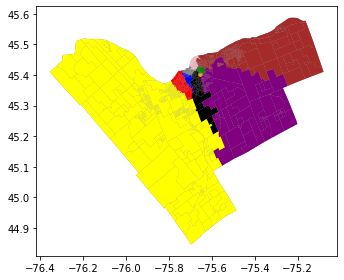

In [4]:
# Quick brute force approach. Not the most efficient code, but it gets the job done...
# May take a few minutes to run
closest_hospitals = []

# Check each neighbourhood (all 761)
for n in neighbourhoods.DAUID:
    # Set the closest distance to -1
    closest = -1;
    # Closest hospital is an empty string
    close_h = ""
    
    # Best to use this CRS when dealing with distance
    nx = neighbourhoods[neighbourhoods.DAUID == n].to_crs(epsg=3857)
    
    # Find the center of the polygon 
    n_lon = nx.geometry.centroid.x.iloc[0]
    n_lat = nx.geometry.centroid.y.iloc[0]
    
    # Save the coordinates into a GeoSeries
    nx = gpd.GeoSeries([Point(n_lon, n_lat)])
            
    # Check each hospital (all 10)
    for h in hospitals.NAME:

        # Best to use this CRS when dealing with distance
        hx = hospitals[hospitals.NAME == h].to_crs(epsg=3857)
        
        # Find the center of the polygon 
        h_lon = hx.geometry.centroid.x.iloc[0]
        h_lat = hx.geometry.centroid.y.iloc[0]
        
        # Save the coordinates into a GeoSeries
        hx = gpd.GeoSeries([Point(h_lon, h_lat)])

        # Calculate the distance between the hospital and the neighbourhood     
        dist = hx.distance(nx) # Distance will be in meters
        
        # Find the closest distance
        if(closest <= 0 or dist[0] <= closest):
            closest = dist[0] # New closest distance
            closest_h = h # New closest hospital

    # Save the data [ONS polygon, closest hospital, distance in km]       
    closest_hospitals.append([n, closest_h, round(closest/1000, 2)])

h = {hospitals.NAME[0]: 'red', # Royal Ottawa Hospital
     hospitals.NAME[1]: 'blue', # Ottawa Hospital - Civic Campus
     hospitals.NAME[2]: 'black', # Ottawa Hospital - Riverside Campus
     hospitals.NAME[3]: 'orange', # CHEO
     hospitals.NAME[4]: 'purple', # Ottawa Hospital - General Campus
     hospitals.NAME[5]: 'brown', # Montfort Hospital
     hospitals.NAME[6]: 'yellow', # Queensway-Carleton Hospital
     hospitals.NAME[7]: 'green', # Rehab Center
     hospitals.NAME[8]: 'gray', # Saint Vincent Hospital
     hospitals.NAME[9]: 'pink'} # Elizabeth Bruyere Hospital

fig, ax = plt.subplots()
neighbourhoods.plot(ax=ax, facecolor='gray');
# Color the polygoons based on the hospital in them
for ch in closest_hospitals:
    nx = neighbourhoods[neighbourhoods.DAUID == ch[0]]
    nx.plot(ax=ax, facecolor=h[ch[1]])
plt.tight_layout();